In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random
import joblib
from google.colab import files

In [ ]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
print("Initial Data Preview:")
print(data.head())

Initial Data Preview:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.

# Step 2: Rename Columns for Readability

In [ ]:
data.columns = ["Diabetes_Status", "High_BP", "High_Cholesterol", "Cholesterol_Check",
                "BMI", "Smoker", "Stroke", "Heart_Disease", "Phys_Activity",
                "Fruit_Intake", "Veg_Intake", "Alcohol_Consumption", "Any_Healthcare",
                "NoDocbc_Cost", "Gen_Health", "Ment_Health", "Phys_Health",
                "Walk_Difficulty", "Gender", "Age", "Education", "Income"]
print("\nData After Renaming Columns:")


Data After Renaming Columns:


In [ ]:
print("\nData After Renaming Columns:")
print(data.head())




Data After Renaming Columns:
   Diabetes_Status  High_BP  High_Cholesterol  Cholesterol_Check   BMI  \
0              0.0      1.0               1.0                1.0  40.0   
1              0.0      0.0               0.0                0.0  25.0   
2              0.0      1.0               1.0                1.0  28.0   
3              0.0      1.0               0.0                1.0  27.0   
4              0.0      1.0               1.0                1.0  24.0   

   Smoker  Stroke  Heart_Disease  Phys_Activity  Fruit_Intake  ...  \
0     1.0     0.0            0.0            0.0           0.0  ...   
1     1.0     0.0            0.0            1.0           0.0  ...   
2     0.0     0.0            0.0            0.0           1.0  ...   
3     0.0     0.0            0.0            1.0           1.0  ...   
4     0.0     0.0            0.0            1.0           1.0  ...   

   Any_Healthcare  NoDocbc_Cost  Gen_Health  Ment_Health  Phys_Health  \
0             1.0           0.0

# Step 3: Check and Handle Missing Values (if any)

In [ ]:
print("\nMissing Values Check:")
print(data.isnull().sum())


Missing Values Check:
Diabetes_Status        0
High_BP                0
High_Cholesterol       0
Cholesterol_Check      0
BMI                    0
Smoker                 0
Stroke                 0
Heart_Disease          0
Phys_Activity          0
Fruit_Intake           0
Veg_Intake             0
Alcohol_Consumption    0
Any_Healthcare         0
NoDocbc_Cost           0
Gen_Health             0
Ment_Health            0
Phys_Health            0
Walk_Difficulty        0
Gender                 0
Age                    0
Education              1
Income                 1
dtype: int64


# Step 4: Visualize the Data
# Plot correlation heatmap

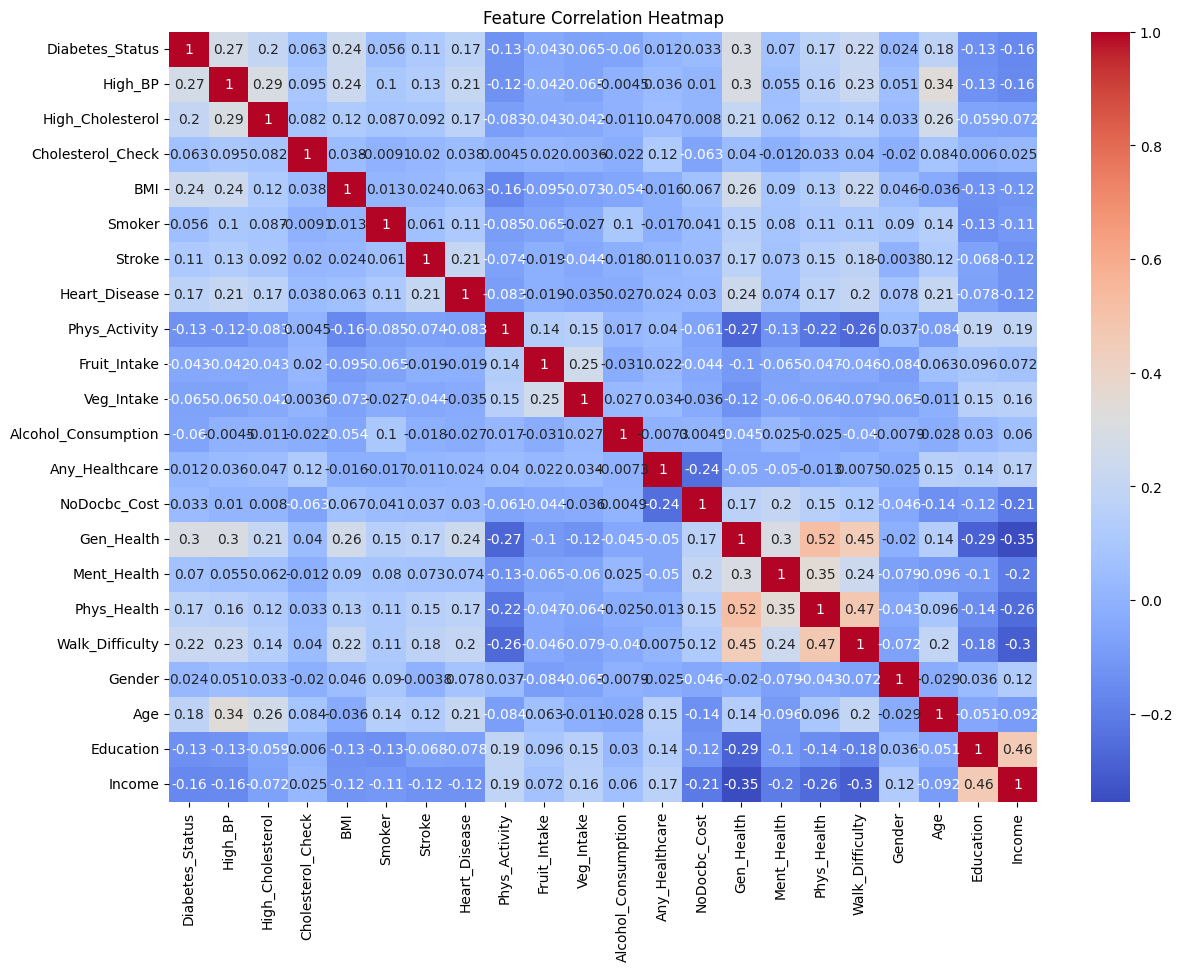

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Visualize the target variable distribution (Heart Disease)

# Step 5: Prepare Features and Target Variables
# Define the target variable and features

In [ ]:
y = data["Heart_Disease"]
X = data.drop(columns=["Heart_Disease"])


# Split data into train and test sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Implement Epsilon-Greedy Algorithm for Model Selection (Game Theory-Inspired)
# Initialize models

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier()

# Set epsilon (exploration factor)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
epsilon = 0.1
model_scores = {"logistic": 0, "random_forest": 0}
best_model = None
for _ in range(10):
    if random.random() < epsilon:

        model_choice = random.choice(["logistic", "random_forest"])
    else:

        model_choice = max(model_scores, key=model_scores.get)


    if model_choice == "logistic":
        logistic_model.fit(X_train, y_train)
        score = logistic_model.score(X_test, y_test)
        model_scores["logistic"] = score
    else:
        random_forest_model.fit(X_train, y_train)
        score = random_forest_model.score(X_test, y_test)
        model_scores["random_forest"] = score

In [ ]:
best_model_name = max(model_scores, key=model_scores.get)
if best_model_name == "logistic":
    best_model = logistic_model
else:
    best_model = random_forest_model

print(f"\nBest model selected: {best_model_name}")



Best model selected: logistic


# Step 7: Evaluate the Model
# Predict on the test set

In [ ]:
y_pred = best_model.predict(X_test)

# Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9081737346101231


# Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10509   106]
 [  968   113]]


# Classification Report


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     10615
         1.0       0.52      0.10      0.17      1081

    accuracy                           0.91     11696
   macro avg       0.72      0.55      0.56     11696
weighted avg       0.88      0.91      0.88     11696



# ROC Curve and AUC Score


In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)


AUC Score: 0.8450391574940426


# Plot ROC Curve

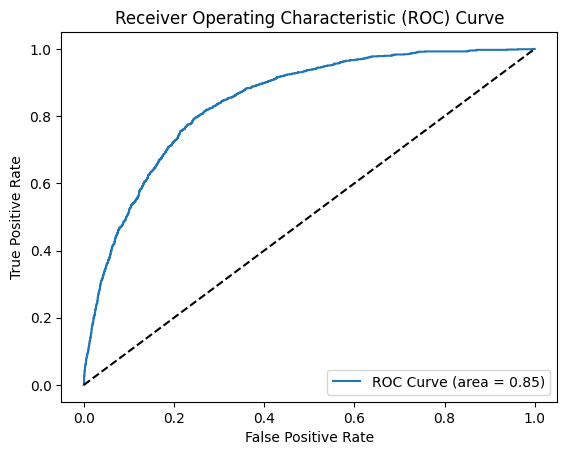

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:

prediction = best_model.predict(X_test)

print("Model prediction output:", prediction)

Model prediction output: [0. 0. 0. ... 0. 0. 0.]


# Step 8: Save and Download the Model

In [ ]:
joblib_file = "health_predictor_model.joblib"
joblib.dump(best_model, joblib_file)
files.download(joblib_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>